In [33]:
#random mutagenesis engineering 

#given one sequence to work with- run random mutagenesis for X iterations to get a high score and a low score.
#try and engineer the highest score you can 

import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random 
from sklearn.linear_model import LinearRegression
import keras
from keras.models import load_model 
from sklearn import preprocessing
import pickle
from pickle import dump, load

%matplotlib inline

In [34]:
model = pickle.load(open("best_linreg_model.pkl", "rb"))

In [36]:
seqs = ["TTCAGTAACCGTGCGTCTGCAATGTGTTCAGACTCCCCGAGTACCTTACG", "TAATTAGAGGGTTGAAAGCGACATCGACAGAAGGGTCTACTTGATACTCG"]
my_kmer_dict = create_kmer_dict(3)
one_d_matrix = count_kmers_with_positions(seqs, my_kmer_dict, 3)
print(model.predict(one_d_matrix))


[5.890625 7.84375 ]


In [21]:
#3.1 functions

################### Provided functions, you will not need to edit these ##################################3
def plotPredictionChanges(predictionValues, graphTitle):
    #plot the change in predicted values 
    plt.plot(list(range(0, len(predictionValues))), predictionValues)
    plt.xlabel("Iteration")
    plt.ylabel("Predicted MRL")
    plt.title(graphTitle)
    plt.show()
    


In [43]:
################ You will need to edit these functions for 3.1 ############################

def mutate(sequence):
    #uniform randomly select a position in the sequence.  Mutate it to a new nucleotide
    #return the mutated sequence
    #Hint: take a look at random.randint, random.sample
    #TODO: return the mutated sequence
    #sequence = 'GGGACATCGTAGAGAGTCGTACTTACCACTCGATTAACATGTTAACAACATACTCGTCCGGCCGATCAGCGGCTA'
    #mut = sequence[random.randint]   #this will call the random index of the sequence
    #random integer for valid indexing can be from 0 to len(sequence)-1 
    randlimits = random.randint(0, len(sequence)-1)
    #mut = sequence[randlimits]
    randmutation = random.sample ("ACGT", 1) #this will give a random mutation at the position in the sequence
    sequence[randlimits] = randmutation
    #need to define sequence as the 50nt DNA sequence, then need to call a random position in the sequence[random.randint], save the index,
    #and try to replace() the value at that index with "G" and define this new string as mutation
    #you know the length of the string is 50 so you can say print (len(sequence[random.randint:])) to get the index
    #print (len(sequence[random.randint:])
    #print(sequence.replace('A','G'))
    #print(random.randint)
    #print (mut)
    return sequence

def runLinearRegressionPrediction(sequence, sklearnModel, k):
    #TODO:
    #runs a prediction for a sequence using your pretrained sklearnModel
    #(Don't forget to add 1 column on for bias term in linear regression )
    #x = np.hstack((np.ones((len(x),1)), x))
    return None

def mutagenesis_higher_mrl(starting_sequence, sklearnModel, kmer_dict, number_iterations, k):
    #repeatedly mutate starting sequence and make predictions
    #if the predicted MRL is higher, replace the sequence with the mutate version
    #repeat this for a set number of iterations
    #return the end product sequence and a list of the intermediate predicted values 
    predictions = []
    #make initial prediction
    startingValue = runLinearRegressionPrediction(starting_sequence, sklearnModel,k)
    predictions.append(startingValue)
    for i in range(0, number_iterations):
        #TODO:
        #1) make mutation to starting sequence
        mutated_sequence = mutate (starting_sequence)
        initial_prediction = runLinearRegressionPrediction(mutated_sequence, sklearnModel,k)
        if initial_prediction > startingValue : 
            starting_sequence = mutated_sequence
        #2) check if the mutant prediction is higher than past prediction & keep the higher 
        #3) append the prediction value to predictions
            predictions.append(mutated_sequence)
    return starting_sequence, predictions
    
def get50RandomNTs():
    #TODO: return a 50 nt random sequence 
    #Hint: take a look at random.choice
    seq =""
    for i in range (50):
        seq += random.choice ("ATCG")
        #concatentates randomly selected nucleotides up to a length of 50
    return seq

In [44]:
seq = get50RandomNTs()
print(seq)
seq = mutate(seq)
print(seq)

CCTTCACATCAAACGCTTCTACAAACTACCTATCTAGAAAGACTAAACGG


TypeError: 'str' object does not support item assignment

In [38]:
#3.1
#TODO: copy your linear regression functions here
#TODO: train your best linear regression model from 2 to use for sequene design

def create_kmer_dict(k):
    # Create dictionary where the keys are kmer strings, and the value for each key is an integer index,
    #  i.e. kmer_dict.values should return an np.array equal to range(4**k) This function will be used to
    #  create consistent indexing for kmers across the other functions in this cell & notebook.
    bases = ['A', 'C', 'G', 'T']

    kmer_dict = {}
    for i, kmer in zip(range(4**k), itertools.product('ACGT', repeat=k)):
        string = ''.join(kmer)
        kmer_dict[string] = i

    return kmer_dict

def count_kmers_with_positions(s, kmer_dict, k):
    #for every sequence in list s, count the number of kmers with position information (see example in instructions)
    stride = 3
    counts = np.zeros((len(s), 4**k * stride))
    #TODO: fill in counts matrix
    
    # for each sequence, look at each kmer, determine which frame it is in, and
    # then increment the count of the appropriate index
    for numSeq, seq in zip(range(len(s)), s):
        for pos in range(len(seq) - k + 1):
            kmer = seq[pos:pos+k]
            frame = (pos - len(seq)) % stride
            index = frame * 4**k + kmer_dict[kmer]
            counts[numSeq][index] += 1
    
    return counts

In [24]:
#3.1 
################### Don't need to edit these, just run this cell ####################################
for i in range(0, 3):
    #attempt higher mutation 
    x = get50RandomNTs()
    print ("Start sequence: ")
    print (x)
    end_seq, values = mutagenesis_higher_mrl(x, linearRegressionModel, kmer_dict, 50, 5)
    print (values[0])
    print ('End sequence: ')
    print(end_seq)
    print  (values[-1])
    plotPredictionChanges(values, "Linear Regression High MRL Sequence " + str(i))
    

NameError: name 'get50RandomNTs' is not defined

In [16]:
#3.2
#Now, attempt the same using optimus 5-prime staring with a randomnly generated 50 nt sequence 
#1) download the retrained_main_MRL_model from github (https://github.com/pjsample/human_5utr_modeling/tree/master/modeling/saved_models)


################### Provided functions, you will not need to edit these ##################################3

def one_hot_encode(seq, seq_len=50):
    # Dictionary returning one-hot encoding of nucleotides. 
    nuc_d = {'a':[1,0,0,0],'c':[0,1,0,0],'g':[0,0,1,0],'t':[0,0,0,1], 'n':[0,0,0,0]}
    # Creat empty matrix.
    vectors=np.empty([1,seq_len,4])
    seq = seq.lower()
    a = np.array([nuc_d[x] for x in seq])
    vectors[0] = a
    return vectors

def make_optimus_prediction(seq, model, scaler):
    #one hot encode sequence 
    oneHot = one_hot_encode(seq)
    # Make predictions
    predictions = model.predict(oneHot).reshape(1, -1)
    # scale predictions to true MRL 
    return scaler.inverse_transform(predictions)[0]

def load_scaler():
    return load(open('optimus_scaler.pkl', 'rb'))


In [ ]:
################ You will need to edit these functions for 3.2 ############################

def mutagenesis_higher_mrl_optimus(starting_sequence, model, scaler, number_iterations):
    #TODO: modify your function from before to use one_hot_encode, make_optimus_prediction 
    #output: return your end sequence, a list of the predicted value for each iteration
    predictions = []
    
    return starting_sequence, predictions

In [17]:
#3.2
#load downloaded keras model 
################### Don't need to edit these, just run this cell ####################################
kerasModelName = "retrained_main_MRL_model.hdf5"
model = load_model(kerasModelName)

In [18]:
#get scaler for the optimus model 
################### Don't need to edit these, just run this cell ####################################
scaler = load_scaler()

Start sequence: 
CTGGCAGTGTCTTTCGCCCCGTGTAGTCGATAATATCAGCGGCATTTAGT
7.461041
End sequence:  CTGAAAGTATTTATAGCCCCGTGTAGTCGAAATTATTATCGGCATTTAGT
7.896367


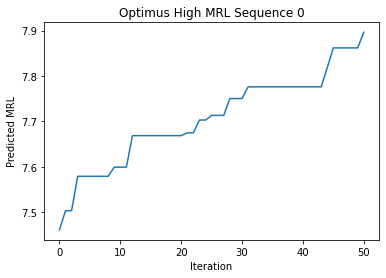

Start sequence: 
TTGGCACAGAATCCGTAAGGCTTCGAGGCACTACATGAACGTGGGACAGC
5.8468895
End sequence:  TTGGTACAGAATACCTAAGGCTTCGAGGTTATATTTGAAAGAGGTAGATC
7.831445


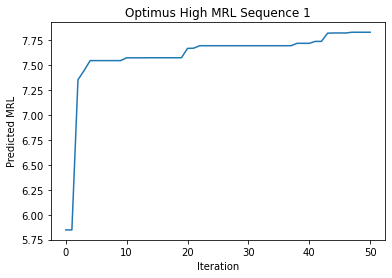

Start sequence: 
AACCCGACATGTGAGTTACGGAGGAGTTAAATGGACCTTCAAATAATCCT
3.384226
End sequence:  GACCGGAATTGAGGTTATCGGACGAATTACATCGACCTTCCATTAAACCT
7.5634828


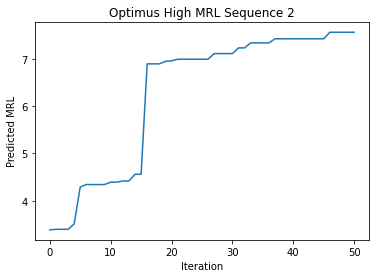

In [19]:
################### Don't need to edit these, just run this cell ####################################
#3.1 
for i in range(0, 3):
    #attempt higher mutation 
    x = get50RandomNTs()
    print ("Start sequence: ")
    print (x)
    end_seq, values = mutagenesis_higher_mrl_optimus(x, model, scaler, 50)
    print (values[0])
    print ('End sequence: ')
    print (end_seq)
    print  (values[-1])
    plotPredictionChanges(values, "Optimus High MRL Sequence " + str(i))
    